In [17]:
import pandas as pd
import random
import re       # regular expression library
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
csv_file = 'money.csv'                              # the input csv file
topic_file = 'topics_'+csv_file
data_path = 'data/'+csv_file
topic_path = 'topics/'+topic_file
df = pd.read_csv(data_path)
df.head()

,text
0,"Let’s say I had an apple, and you had an orang..."
1,an apple.
2,"We could trade, and both of us would end up ha..."
3,"But now let’s say I had an apple tree, and you..."
4,"the apple tree were ready, but the oranges wou..."


In [19]:
# Remove punctuation
df['processed_text'] = \
df['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['processed_text'] = \
df['processed_text'].map(lambda x: x.lower())

# Print out the first rows of papers
df.head()

<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
/var/folders/4z/4w7rz93j1gdcqnmppw47r0jr0000gn/T/ipykernel_7361/3654548360.py:3: DeprecationWarning: invalid escape sequence '\.'
  df['text'].map(lambda x: re.sub('[,\.!?]', '', x))


,text,processed_text
0,"Let’s say I had an apple, and you had an orang...",let’s say i had an apple and you had an orange...
1,an apple.,an apple
2,"We could trade, and both of us would end up ha...",we could trade and both of us would end up hap...
3,"But now let’s say I had an apple tree, and you...",but now let’s say i had an apple tree and you ...
4,"the apple tree were ready, but the oranges wou...",the apple tree were ready but the oranges woul...


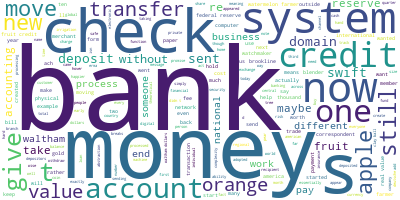

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['processed_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [21]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.processed_text.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bansharee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2)]


In [23]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"bank" + 0.016*"credits" + 0.012*"money" + 0.012*"would" + '
  '0.012*"business" + 0.012*"farmer" + 0.012*"quarter" + 0.012*"credit" + '
  '0.012*"system" + 0.012*"watermelon"'),
 (1,
  '0.015*"orange" + 0.013*"money" + 0.013*"system" + 0.013*"work" + '
  '0.011*"give" + 0.010*"apple" + 0.009*"value" + 0.009*"wanted" + '
  '0.009*"balance" + 0.009*"different"'),
 (2,
  '0.029*"banks" + 0.015*"bank" + 0.015*"money" + 0.015*"check" + '
  '0.011*"reserve" + 0.011*"means" + 0.011*"federal" + 0.011*"would" + '
  '0.011*"system" + 0.011*"checks"'),
 (3,
  '0.020*"money" + 0.020*"system" + 0.015*"worth" + 0.015*"new" + '
  '0.010*"different" + 0.010*"give" + 0.010*"waltham" + 0.010*"using" + '
  '0.010*"bill" + 0.005*"bank"'),
 (4,
  '0.029*"banks" + 0.022*"bank" + 0.018*"one" + 0.018*"value" + 0.011*"checks" '
  '+ 0.011*"money" + 0.011*"process" + 0.011*"reserve" + 0.011*"real" + '
  '0.011*"like"'),
 (5,
  '0.026*"money" + 0.018*"fruit" + 0.018*"reserve" + 0.018*"bank" + 0.01

## Analyzing Gensim Model Results

In [24]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.008753 -0.106906       1        1  15.164207
7     -0.003735 -0.098785       2        1  13.143547
9      0.018607  0.093278       3        1  10.698608
4     -0.111406  0.079538       4        1   9.932331
5      0.080196 -0.011542       5        1   9.905208
2     -0.135385 -0.041350       6        1   9.452535
0      0.070111  0.055653       7        1   9.304930
1     -0.011890  0.059756       8        1   8.057272
6      0.089702 -0.003366       9        1   8.053196
3     -0.004955 -0.026276      10        1   6.288166, topic_info=         Term       Freq      Total Category  logprob  loglift
256     banks  18.000000  18.000000  Default  30.0000  30.0000
200   reserve   8.000000   8.000000  Default  29.0000  29.0000
88      value  11.000000  11.000000  Default  28.0000  28.0000
65     system  17.000000  17.000000  Default  27.0000  27.0000
156     money  46.000000  46.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
495  clearing   0.673289   1.961697  Topic10  -5.2204   1.6971
633   payment   0.673289   2.667084  Topic10  -5.2204   1.3899
64     credit   0.673287   5.351617  Topic10  -5.2204   0.6935
61    credits   0.673286  13.773724  Topic10  -5.2204  -0.2518
776       top   0.673283   1.961688  Topic10  -5.2204   1.6971

[594 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
303       1  0.715117   ability
303       9  0.357558   ability
245      10  0.772027  accepted
584       1  0.702722    access
240       1  0.178900   account
...     ...       ...       ...
673       3  0.738230     wrong
118       1  0.469889      year
118       6  0.234945      year
118       8  0.234945      year
104       3  0.738243       yet

[829 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 10, 5, 6, 3, 1, 2, 7, 4])